# Сборный проект №2

**Описание проекта**

Вы работаете в стартапе, который продаёт продукты питания. Нужно разобраться, как ведут себя пользователи вашего мобильного приложения. 

Изучите воронку продаж. Узнайте, как пользователи доходят до покупки. Сколько пользователей доходит до покупки, а сколько — «застревает» на предыдущих шагах? На каких именно?

После этого исследуйте результаты A/A/B-эксперимента. Дизайнеры захотели поменять шрифты во всём приложении, а менеджеры испугались, что пользователям будет непривычно. Договорились принять решение по результатам A/A/B-теста. Пользователей разбили на 3 группы: 2 контрольные со старыми шрифтами и одну экспериментальную — с новыми. Выясните, какой шрифт лучше.

Создание двух групп A вместо одной имеет определённые преимущества. Если две контрольные группы окажутся равны, вы можете быть уверены в точности проведенного тестирования. Если же между значениями A и A будут существенные различия, это поможет обнаружить факторы, которые привели к искажению результатов. Сравнение контрольных групп также помогает понять, сколько времени и данных потребуется для дальнейших тестов.

В случае общей аналитики и A/A/B-эксперимента работайте с одними и теми же данными. В реальных проектах всегда идут эксперименты. Аналитики исследуют качество работы приложения по общим данным, не учитывая принадлежность пользователей к экспериментам.

**Описание данных**

Каждая запись в логе — это действие пользователя, или событие. 

*EventName* — название события;

*DeviceIDHash* — уникальный идентификатор пользователя;

*EventTimestamp* — время события;

*ExpId* — номер эксперимента: 246 и 247 — контрольные группы, а 248 — экспериментальная.

**Инструкция по выполнению проекта**

***Шаг 1. Откройте файл с данными и изучите общую информацию***

Путь к файлу: /datasets/logs_exp.csv. Скачать датасет

***Шаг 2. Подготовьте данные***

-Замените названия столбцов на удобные для вас;

-Проверьте пропуски и типы данных. Откорректируйте, если нужно;

-Добавьте столбец даты и времени, а также отдельный столбец дат;

***Шаг 3. Изучите и проверьте данные***

-Сколько всего событий в логе?

-Сколько всего пользователей в логе?

-Сколько в среднем событий приходится на пользователя?

-Данными за какой период вы располагаете? Найдите максимальную и минимальную дату. Постройте гистограмму по дате и времени. Можно ли быть уверенным, что у вас одинаково полные данные за весь период? Технически в логи новых дней по некоторым пользователям могут «доезжать» события из прошлого — это может «перекашивать данные». Определите, с какого момента данные полные и отбросьте более старые. Данными за какой период времени вы располагаете на самом деле?

-Много ли событий и пользователей вы потеряли, отбросив старые данные?

-Проверьте, что у вас есть пользователи из всех трёх экспериментальных групп.

***Шаг 4. Изучите воронку событий***

-Посмотрите, какие события есть в логах, как часто они встречаются. Отсортируйте события по частоте.

-Посчитайте, сколько пользователей совершали каждое из этих событий. Отсортируйте события по числу пользователей. Посчитайте долю пользователей, которые хоть раз совершали событие.

-Предположите, в каком порядке происходят события. Все ли они выстраиваются в последовательную цепочку? Их не нужно учитывать при расчёте воронки.

-По воронке событий посчитайте, какая доля пользователей проходит на следующий шаг воронки (от числа пользователей на предыдущем). То есть для последовательности событий A → B → C посчитайте отношение числа пользователей с событием B к количеству пользователей с событием A, а также отношение числа пользователей с событием C к количеству пользователей с событием B.

-На каком шаге теряете больше всего пользователей?

-Какая доля пользователей доходит от первого события до оплаты?

***Шаг 5. Изучите результаты эксперимента***

-Сколько пользователей в каждой экспериментальной группе?

-Есть 2 контрольные группы для А/А-эксперимента, чтобы проверить корректность всех механизмов и расчётов. Проверьте, находят ли статистические критерии разницу между выборками 246 и 247.

-Выберите самое популярное событие. Посчитайте число пользователей, совершивших это событие в каждой из контрольных групп. Посчитайте долю пользователей, совершивших это событие. Проверьте, будет ли отличие между группами статистически достоверным. Проделайте то же самое для всех других событий (удобно обернуть проверку в отдельную функцию). Можно ли сказать, что разбиение на группы работает корректно?

-Аналогично поступите с группой с изменённым шрифтом. Сравните результаты с каждой из контрольных групп в отдельности по каждому событию. Сравните результаты с объединённой контрольной группой. Какие выводы из эксперимента можно сделать?

-Какой уровень значимости вы выбрали при проверке статистических гипотез выше? Посчитайте, сколько проверок статистических гипотез вы сделали. При уровне значимости 0.1 каждый десятый раз можно получать ложный результат. Какой уровень значимости стоит применить? Если вы хотите изменить его, проделайте предыдущие пункты и проверьте свои выводы.

### Загрузка данных и изучение общей информации

In [1]:
# Импортируем библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import date, datetime, timedelta
import matplotlib.pyplot as plt
from scipy import stats as st
import math as mth
from plotly import graph_objects as go
import os

In [2]:
# Открываем файл и сохраняем в переменной
pth1 = '/datasets/logs_exp.csv'
if os.path.exists(pth1):
    logs = pd.read_csv(pth1, sep='\t')
else:
    print('Something is wrong')

In [3]:
# Выводим на экран таблицу logs
logs.head()

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


In [4]:
# Посмотрим общую информацию о таблице logs
logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


#### Вывод

Мы получили таблицу logs, где содержатся 4 столбца и 244126 строк. 

В столбце EventTimestamp должен быть тип данных datetime64.

Также сразу заметно, что для удобства нужно будет привести названия столбцов к единому стилю и змеиному_регистру.

### Подготовка данных

In [5]:
# Приведем названия столбцов в таблице logs к единому стилю
logs = logs.rename(columns={'EventName': 'event_name',
                            'DeviceIDHash': 'user_id',
                            'EventTimestamp': 'timestamp',
                            'ExpId': 'exp_id'})
logs.columns

Index(['event_name', 'user_id', 'timestamp', 'exp_id'], dtype='object')

In [6]:
# Проверим таблицу logs на наличие пропусков
logs.isna().sum()

event_name    0
user_id       0
timestamp     0
exp_id        0
dtype: int64

In [7]:
# Проверим таблицу logs на наличие дубликатов
logs.duplicated().sum()

413

In [8]:
# Удалим дубликаты и проверим таблицу logs еще раз
logs.drop_duplicates(inplace = True)
logs.duplicated().sum()

0

In [9]:
# Изменим тип данных в столбце timestamp
logs['timestamp'] = pd.to_datetime(logs['timestamp'], unit='s')
# Выполним проверку
logs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243713 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   event_name  243713 non-null  object        
 1   user_id     243713 non-null  int64         
 2   timestamp   243713 non-null  datetime64[ns]
 3   exp_id      243713 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 9.3+ MB


In [10]:
# Посмотрим на столбец timestamp после изменения типа данных
logs.head()

,event_name,user_id,timestamp,exp_id
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248


In [11]:
# Добавим в таблицу logs столбец с датой. (Столбец с датой и временем у нас есть - timestamp) 
logs['date'] = logs['timestamp'].dt.date
# Посмотрим на таблицу logs после добавления столбца date
logs.head()

,event_name,user_id,timestamp,exp_id,date
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246,2019-07-25
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248,2019-07-25


#### Вывод

После предобработки данных в таблице logs все названия столбцов приведены к единому стилю, типы данных преобразованы в правильные. Дубликаты и пропуски в таблице отсутсвуют. Также был добавлен столбец date. Данные готовы к анализу.

### Изучение и проверка данных

#### Сколько всего событий в логе?

In [12]:
# Узнаем уникальные названия событий
logs['event_name'].unique()

array(['MainScreenAppear', 'PaymentScreenSuccessful', 'CartScreenAppear',
       'OffersScreenAppear', 'Tutorial'], dtype=object)

In [13]:
# Узнаем, сколько всего событий в логе
logs['event_name'].count()

243713

In [14]:
# Узнаем, количество событий каждого вида
logs['event_name'].value_counts()

MainScreenAppear           119101
OffersScreenAppear          46808
CartScreenAppear            42668
PaymentScreenSuccessful     34118
Tutorial                     1018
Name: event_name, dtype: int64

***На основе полученных данных можно отметить, что:***

Таблица содержит 5 уникальных названий событий: MainScreenAppear (119101 событий), OffersScreenAppear (46808 событий), CartScreenAppear (42668 событий), PaymentScreenSuccessful (34118 событий), Tutorial (1018 событий).

Всего в логе 243713 событий.

#### Сколько всего пользователей в логе?

In [15]:
# Узнаем, сколько всего пользователей в логе
len(logs['user_id'].unique())

7551

***На основе полученных данных можно отметить, что:***

Мы узнали, что всего в логе 7551 пользователь.

####  Сколько в среднем событий приходится на пользователя?

In [16]:
# Узнаем, в среднем событий приходится на пользователя
event_per_user = logs.groupby('user_id')['event_name'].count()
event_per_user.describe()

count    7551.000000
mean       32.275593
std        65.154219
min         1.000000
25%         9.000000
50%        20.000000
75%        37.000000
max      2307.000000
Name: event_name, dtype: float64

***На основе полученных данных можно отметить, что:***

Параметр mean показывает, что в среднем, на пользователя приходится 32 события.

#### Данными за какой период вы располагаете? 

In [17]:
# Найдем максимальную и минимальную дату
display(logs['date'].max())
display(logs['date'].min())

datetime.date(2019, 8, 7)

datetime.date(2019, 7, 25)

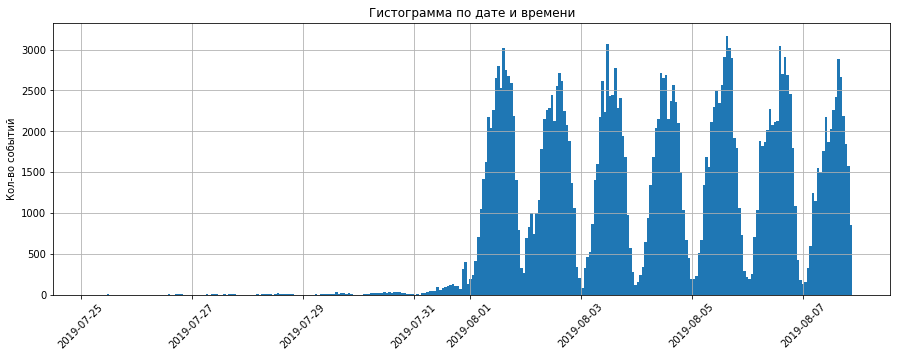

In [18]:
# Построим гистограмму по дате и времени
plt.figure(figsize=(15,5))
logs['timestamp'].hist(bins=300)
plt.title('Гистограмма по дате и времени')
plt.ylabel('Кол-во событий')
plt.xticks(rotation=45)
plt.show()

***На основе полученных данных можно отметить, что:***

График показывает, что мы располагаем полными данными, начиная с 01.08.2019 по 07.08.2019 включительно. В период с 25.07.2019 по 01.08.2019 практически никакой активности не было.

Следовательно, у нас нет одинаково полных данных за весь период.

Следовательно, на самом деле мы располагаем данными за период с 01.08.2019 по 07.08.2019 включительно.

In [19]:
# Оставим данные за период с 01.08.2019 по 07.08.2019 включительно
new_date = pd.to_datetime('2019-08-01', format = '%Y-%m-%d')
new_logs = logs[logs['date'] >= new_date]

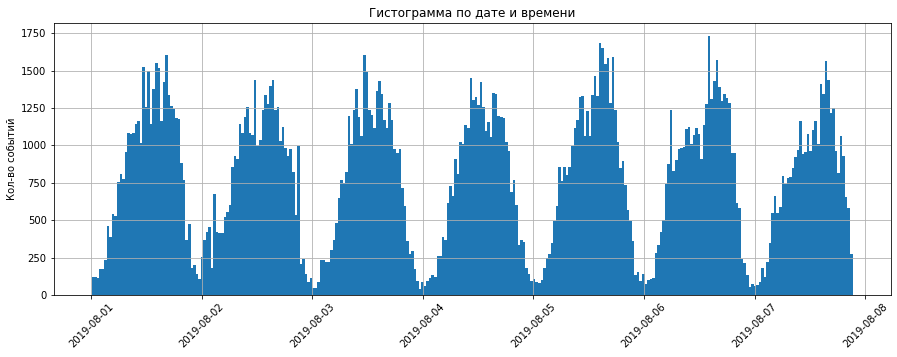

In [20]:
# Для проверки построим новую гистограмму по дате и времени
plt.figure(figsize=(15,5))
new_logs['timestamp'].hist(bins=300)
plt.title('Гистограмма по дате и времени')
plt.ylabel('Кол-во событий')
plt.xticks(rotation=45)
plt.show()

#### Много ли событий и пользователей вы потеряли, отбросив старые данные?


In [21]:
display('Потеряно событий:', len(logs)-len(new_logs))
display('Потеряно событий (в %):', round((len(logs)-len(new_logs))*100/len(logs), 2))

'Потеряно событий:'

2826

'Потеряно событий (в %):'

1.16

In [22]:
display('Потеряно пользователей:', logs['user_id'].nunique()-new_logs['user_id'].nunique())
display('Потеряно пользователей (в %):', round((logs['user_id'].nunique()-new_logs['user_id'].nunique())*100/logs['user_id'].nunique(), 2))

'Потеряно пользователей:'

17

'Потеряно пользователей (в %):'

0.23

***На основе полученных данных можно отметить, что:***

Мы потеряли всего 2826 событий, что составляет всего 1.16%. А также мы потеряли 17 пользователей, что составляет всего лишь 0.23%. Я считаю, что потери минимальны.

#### Проверьте, что у вас есть пользователи из всех трёх экспериментальных групп.

In [23]:
display(new_logs.groupby('exp_id')['user_id'].nunique())

exp_id
246    2484
247    2513
248    2537
Name: user_id, dtype: int64

***На основе полученных данных можно отметить, что:***

У нас есть пользователи из всех трёх экспериментальных групп.

#### Вывод

В ходе изучения и проверки данных мы узнали, что таблица содержит 5 уникальных событий. Всего в логе 243713 событий и 7551 пользователь. В среднем, на пользователя приходится 32 события.

Также мы поняли, что на самом деле мы располагаем данными за период с 01.08.2019 по 07.08.2019 включительно, так как, судя по графику, в период с 25.07.2019 по 01.08.2019 практически никакой активности не было.

После того, как мы очистили данные и оставили период с 01.08.2019 по 07.08.2019 включительно, мы потеряли всего 1.16% событий и 0.23% пользователей (17 человек). Тем не менее, потери минимальны.

Также мы подтвердили, что у нас имеются пользователи из всех трёх экспериментальных групп.

### Изучение воронки событий

#### Посмотрите, какие события есть в логах, как часто они встречаются. 

In [24]:
# Узнаем, количество событий каждого вида
new_logs['event_name'].value_counts().sort_values(ascending=False)

MainScreenAppear           117328
OffersScreenAppear          46333
CartScreenAppear            42303
PaymentScreenSuccessful     33918
Tutorial                     1005
Name: event_name, dtype: int64

***На основе полученных данных можно отметить, что:***

В логах есть следующие события: MainScreenAppear, OffersScreenAppear, CartScreenAppear, PaymentScreenSuccessful, Tutorial.

Самое частое событие - MainScreenAppear (Появление главного экрана) случается 117328 раз. 

Далее идет событие OffersScreenAppear (Отображение каталога, предложений магазина), которое случается 46333 раза, за ним с небольшим отрывом - CartScreenAppear (Отображение корзины), которое случается 42303 раза. Событие PaymentScreenSuccessful (Отображение, что платеж прошел) случается 33918 раз.

А вот самое редкое событие - это Tutorial (Руководство/консультация/обучение), которое встречается всего 1005 раз.

#### Посчитайте, сколько пользователей совершали каждое из этих событий.

In [25]:
# Узнаем, количество пользователей, совершивших каждое из событий
user_and_event = new_logs.groupby('event_name')['user_id'].nunique().sort_values(ascending=False).to_frame()
user_and_event

,user_id
event_name,
MainScreenAppear,7419
OffersScreenAppear,4593
CartScreenAppear,3734
PaymentScreenSuccessful,3539
Tutorial,840


In [26]:
# Посчитаем долю пользователей, которые хоть раз совершали событие
all_users = len(logs['user_id'].unique())
user_and_event['percent'] = (user_and_event['user_id'] / all_users).round(2) * 100 
user_and_event

,user_id,percent
event_name,,
MainScreenAppear,7419,98.0
OffersScreenAppear,4593,61.0
CartScreenAppear,3734,49.0
PaymentScreenSuccessful,3539,47.0
Tutorial,840,11.0


***На основе полученных данных можно отметить, что:***

98% пользователей (7419 человек) совершали событие MainScreenAppear (были на главном экране).

61% пользователей (4593 человек) совершали событие OffersScreenAppear (переходили в каталог/раздел предложений магазина).

49% пользователей (3734 человек) совершали событие CartScreenAppear (переходили в корзину).

47% пользователей (3539 человек) совершали событие PaymentScreenSuccessful (переходили на экран оплаты).

11% пользователей (840 человек) совершали событие Tutorial (руководство/консультация/обучение).

#### Предположите, в каком порядке происходят события. Все ли они выстраиваются в последовательную цепочку?

Исходя из предыдущих исследований, мы можем увидеть определенную воронку. Скорее всего, пользователи сначала попадают на главный экран (MainScreenAppear), затем они переходят в раздел предложений/каталог (OffersScreenAppear), далее переходят в корзину (CartScreenAppear), потом переходят на экран оплаты (PaymentScreenSuccessful). 

Также, если пользователю это необходимо, он может перейти в раздел "руководство/консультация/обучение" (Tutorial). Думаю, что данное событие может происходить как в конце нашей воронки, так и, например, до покупки товара - все зависит от пользователя.

#### По воронке событий посчитайте, какая доля пользователей проходит на следующий шаг воронки (от числа пользователей на предыдущем).

In [27]:
# Уберем tutorial из данных, так как до конца неизвестно, на каком этапе воронки находится это событие
logs_without_tutorial = user_and_event.copy() 
logs_without_tutorial = logs_without_tutorial[:4]

In [28]:
# Выведем таблицу без tutorial на экран
logs_without_tutorial

,user_id,percent
event_name,,
MainScreenAppear,7419,98.0
OffersScreenAppear,4593,61.0
CartScreenAppear,3734,49.0
PaymentScreenSuccessful,3539,47.0


In [29]:
logs_without_tutorial['share'] = logs_without_tutorial['user_id']/logs_without_tutorial['user_id'].shift(1)
logs_without_tutorial['share'] = (logs_without_tutorial['share'] * 100).round(2).map('{0:.2f}%'.format)
logs_without_tutorial

,user_id,percent,share
event_name,,,
MainScreenAppear,7419,98.0,nan%
OffersScreenAppear,4593,61.0,61.91%
CartScreenAppear,3734,49.0,81.30%
PaymentScreenSuccessful,3539,47.0,94.78%


***На основе полученных данных можно отметить, что:***

На первом событии MainScreenAppear в воронке находятся 100% пользователей.

На второе событие OffersScreenAppear переходит 61.91% пользователей от числа пользователей на событии MainScreenAppear.

На третье событие CartScreenAppear переходит 81.3% пользователей от числа пользователей на событии OffersScreenAppear.

На четвертое событие PaymentScreenSuccessful переходит 94.78% пользователей от числа пользователей на событии CartScreenAppear.

#### На каком шаге теряете больше всего пользователей?

Исходя из предыдущего шага, можно понять, что самое большое количество пользователей теряется на главном экране (событие MainScreenAppear) - целых 38.09% пользователей не переходят далее. Стоит обратить внимание на главный экран, возможно стоит сделать его более удобным, функциональным или визуально привлекательным. Возможно, стоит как-то поработать над кнопкой перехода в раздел предложений/каталог, может быть эта кнопка не для всех заметна и т.д.

#### Какая доля пользователей доходит от первого события до оплаты?

In [30]:
# Еще раз выведем на экран таблицу
logs_without_tutorial

,user_id,percent,share
event_name,,,
MainScreenAppear,7419,98.0,nan%
OffersScreenAppear,4593,61.0,61.91%
CartScreenAppear,3734,49.0,81.30%
PaymentScreenSuccessful,3539,47.0,94.78%


In [31]:
# Найдем долю пользователей, которые доходят от MainScreenAppear до PaymentScreenSuccessful
3539/7419*100

47.70184661005526

***На основе полученных данных можно отметить, что:***

47.7% пользователей доходит от первого события (MainScreenAppear) до оплаты (PaymentScreenSuccessful).

#### Вывод

Мы выяснили, что в логах есть следующие события: MainScreenAppear, OffersScreenAppear, CartScreenAppear, PaymentScreenSuccessful, Tutorial. Самое частое событие - MainScreenAppear (Появление главного экрана) случается 117328 раз. Самое редкое событие - Tutorial (Руководство/консультация/обучение), встречается всего 1005 раз.

Самое большое количество пользователей (98%, 7419 человек) совершали событие MainScreenAppear. И всего 11% пользователей (840 человек) совершали событие Tutorial.

Также мы предположили, что пользователи сначала попадают на главный экран (MainScreenAppear), затем они переходят в раздел предложений/каталог (OffersScreenAppear), далее переходят в корзину (CartScreenAppear), потом переходят на экран оплаты (PaymentScreenSuccessful). А вот переход в раздел "руководство/консультация/обучение" (Tutorial) может происходить как в конце нашей воронки, так и, например, до покупки товара - все зависит от пользователя. Поэтому мы убрали Тutorial из дальнейших исследований.

Мы узнали, что из MainScreenAppear в OffersScreenAppear переходит 61.91% пользователей, из OffersScreenAppear в  CartScreenAppear переходит 81.3% пользователей, из CartScreenAppear в PaymentScreenSuccessful переходит 94.78% пользователей. Также мы поняли, что самое большое количество пользователей (38.09%) теряется при переходе из MainScreenAppear в OffersScreenAppear. 

Также мы узнали, что 47.7% пользователей доходит от первого события (MainScreenAppear) до оплаты (PaymentScreenSuccessful).

### Изучение результатов эксперимента

#### Сколько пользователей в каждой экспериментальной группе?

In [32]:
# Узнаем, сколько пользователей в каждой группе
new_logs.groupby('exp_id')['user_id'].nunique().to_frame()

,user_id
exp_id,
246,2484
247,2513
248,2537


***На основе полученных данных можно отметить, что:***

В группе "246" (А, контрольная) число пользователей - 2484, в группе "247" (А, контрольная) число пользователей - 2513, в группе "248" (В, экспериментальная) - 2537 пользователей. Количество везде плюс-минус одинаковое.

#### Проверьте, находят ли статистические критерии разницу между выборками 246 и 247.

In [33]:
# Проверим, встречаются ли одни и те же значения во всех трех группах
len(np.intersect1d(logs.query('exp_id == 246')['user_id'].unique(), logs.query('exp_id == "247"')['user_id'].unique(), logs.query('exp_id == "248"')['user_id'].unique()))

0

In [34]:
# Найдем разницу между группами 246 и 247 
group_246_a = new_logs.query('exp_id == 246').groupby('exp_id')['user_id'].nunique().reset_index()
group_247_a = new_logs.query('exp_id == 247').groupby('exp_id')['user_id'].nunique().reset_index()
difference = 1 - group_246_a.iloc[0]['user_id'] / group_247_a.iloc[0]['user_id']
print('Разница между группами 246 и 247 - {:.2%}'.format(difference))

Разница между группами 246 и 247 - 1.15%


***На основе полученных данных можно отметить, что:***

Разница между выборками 246 и 247 составляет 1.15%, но в целом, думаю, это не так критично.

#### Выберите самое популярное событие. Посчитайте число пользователей, совершивших это событие в каждой из контрольных групп. Посчитайте долю пользователей, совершивших это событие. Проверьте, будет ли отличие между группами статистически достоверным. Проделайте то же самое для всех других событий (удобно обернуть проверку в отдельную функцию). Можно ли сказать, что разбиение на группы работает корректно?

In [35]:
# Как мы узнали ранее, самое популярное событие - это MainScreenAppear (появление главного экрана)
# Посмотрим на число пользователей, совершивших это событие в каждой из контрольных групп 
all_groups = new_logs.pivot_table(index='exp_id', columns='event_name', values='user_id', aggfunc='nunique')
all_groups

event_name,CartScreenAppear,MainScreenAppear,OffersScreenAppear,PaymentScreenSuccessful,Tutorial
exp_id,,,,,
246,1266,2450,1542,1200,278
247,1238,2476,1520,1158,283
248,1230,2493,1531,1181,279


***Сформулируем гипотезы.***

Нулевая: Доли пользователей, побывавших на этапе воронки, в обеих группах равны.

Альтернативная: Доли пользователей, побывавших на этапе воронки, в обеих группах рахличаются.

In [36]:
# Проверка гипотезы о равенстве долей (Z_test)
# Напишем функцию для проверки
# Критический уровень статистической значимости
alpha = .05 
def z_test(dataframe, groups, alpha):
    # Пользователи в каждой группе
    users = [dataframe.query('exp_id == @group')['user_id'].nunique() for group in groups]
    # Перебор экспериментальных групп по событиям и количество пользователей
    for event in dataframe.event_name.unique():
        events = [dataframe.query('exp_id == %d and event_name == "%s"' % (group, event))['user_id'].nunique() for group in groups]
        # Пропорция успехов в первой группе:
        p1 = events[0] / users[0] 
        # Пропорция успехов во второй группе:
        p2 = events[1] / users[1] 
        # Пропорция успехов в комбинированном датасете:
        p_combined = (events[0] + events[1]) / (users[0] + users[1]) 
        # Разница пропорций в датасетах
        difference = p1 - p2 
        # Считаем статистику в ст.отклонениях стандартного нормального распределения
        z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1 / users[0] + 1 / users[1]))
        # Задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
        distr = st.norm(0, 1) 
        p_value = (1 - distr.cdf(abs(z_value))) * 2
        print('Событие:', event)
        print('p-значение: ', p_value)
        if p_value < alpha:
            print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
        else:
            print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными') 

In [37]:
# Проведем А/А тест и проверим отличие между контрольными группами 246 и 247
z_test(new_logs, [246, 247], 0.05)

Событие: Tutorial
p-значение:  0.9376996189257114
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
Событие: MainScreenAppear
p-значение:  0.7570597232046099
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
Событие: OffersScreenAppear
p-значение:  0.2480954578522181
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
Событие: CartScreenAppear
p-значение:  0.22883372237997213
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
Событие: PaymentScreenSuccessful
p-значение:  0.11456679313141849
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


***На основе полученных данных можно отметить, что:***

Число пользователей, совершивших самое популярное событие MainScreenAppear в группе 246 составило 2450 человек, а в группе 247 - 2476 человек (в группе 248 - 2493 человека).

Мы создали функцию для проверки гипотезы о равенстве доле, провели А/А тест и узнали, что оснований считать доли разными нет. То есть статистически значимых отличий между группами нет. Все работает корректно.

#### Аналогично поступите с группой с изменённым шрифтом. Сравните результаты с каждой из контрольных групп в отдельности по каждому событию. Сравните результаты с объединённой контрольной группой. Какие выводы из эксперимента можно сделать?

In [38]:
# Проведем А/В тест и проверим отличие между контрольной группой 246 и экспериментальной группой 248
z_test(new_logs, [246, 248], 0.05)

Событие: Tutorial
p-значение:  0.8264294010087645
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
Событие: MainScreenAppear
p-значение:  0.2949721933554552
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
Событие: OffersScreenAppear
p-значение:  0.20836205402738917
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
Событие: CartScreenAppear
p-значение:  0.07842923237520116
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
Событие: PaymentScreenSuccessful
p-значение:  0.2122553275697796
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


In [39]:
# Проведем А/В тест и проверим отличие между контрольной группой 247 и экспериментальной группой 248
z_test(new_logs, [247, 248], 0.05)

Событие: Tutorial
p-значение:  0.765323922474501
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
Событие: MainScreenAppear
p-значение:  0.4587053616621515
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
Событие: OffersScreenAppear
p-значение:  0.9197817830592261
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
Событие: CartScreenAppear
p-значение:  0.5786197879539783
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
Событие: PaymentScreenSuccessful
p-значение:  0.7373415053803964
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


In [40]:
# Проведем А/В тест и проверим отличие между объединённой контрольной группой и экспериментальной группой 248
groups_246_and_247 = new_logs.copy()
groups_246_and_247['exp_id'].replace({247: 246}, inplace=True)
z_test(groups_246_and_247, [246, 248], 0.05)

Событие: Tutorial
p-значение:  0.764862472531507
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
Событие: MainScreenAppear
p-значение:  0.29424526837179577
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
Событие: OffersScreenAppear
p-значение:  0.43425549655188256
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
Событие: CartScreenAppear
p-значение:  0.18175875284404386
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
Событие: PaymentScreenSuccessful
p-значение:  0.6004294282308704
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


***На основе полученных данных можно отметить, что:***

Мы провели А/В тест между группами 246 и 248, 247 и 248, 246+247 и 248 и узнали, что оснований считать доли разными нет. То есть статистически значимых отличий между группами нет. Соответственно, изменение шрифта не повлияло на пользователей.

#### Какой уровень значимости вы выбрали при проверке статистических гипотез выше? Посчитайте, сколько проверок статистических гипотез вы сделали. При уровне значимости 0.1 каждый десятый раз можно получать ложный результат. Какой уровень значимости стоит применить? Если вы хотите изменить его, проделайте предыдущие пункты и проверьте свои выводы.

При проверке статистических гипотез я выбрала уровень значимости 0.05. Было сделано 20 проверок (5 А/А тестов и 15 А/В тестов).
При уровне значимости 0.1 лишь при проведении А/В теста между контрольной группой 246 и экспериментальной группой 248 в событии CartScreenAppear минимальное значение 0.078, в остальных случаях p-value больше и 0.1, и 0.05. 


In [41]:
# Оценим вероятность ошибки первого рода
1-(1-0.05)**20

0.6415140775914581

***На основе полученных данных можно отметить, что:***
    
Полученная вероятность ошибки составляет 0.641 (64%), что больше уровня значимости в 0.05, следовательно, выбранный уровень значимости не подходит.

Применим поправку Бонферрони: 0.05 / 20 = 0.0025. Скорректируем уровень значимости и проведем тесты еще раз и проверим выводы.

In [42]:
# Оценим вероятность ошибки для нового уровня значимости
1-(1-0.0025)**20

0.04883012474683324

***На основе полученных данных можно отметить, что:***

Полученная вероятность ошибки теперь составляет 0.048 (4%), что меньше уровня значимости в 0.0025, следовательно, выбранный уровень значимости теперь является оптимальным.

In [43]:
# После применения поправки Бонферрони еще раз проведем А/А тест и проверим отличие между контрольными группами 246 и 247
z_test(new_logs, [246, 247], 0.0025)

Событие: Tutorial
p-значение:  0.9376996189257114
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
Событие: MainScreenAppear
p-значение:  0.7570597232046099
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
Событие: OffersScreenAppear
p-значение:  0.2480954578522181
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
Событие: CartScreenAppear
p-значение:  0.22883372237997213
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
Событие: PaymentScreenSuccessful
p-значение:  0.11456679313141849
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


In [44]:
# После применения поправки Бонферрони еще раз проведем А/В тест и проверим отличие между контрольной группой 246 и экспериментальной группой 248
z_test(new_logs, [246, 248], 0.0025)

Событие: Tutorial
p-значение:  0.8264294010087645
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
Событие: MainScreenAppear
p-значение:  0.2949721933554552
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
Событие: OffersScreenAppear
p-значение:  0.20836205402738917
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
Событие: CartScreenAppear
p-значение:  0.07842923237520116
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
Событие: PaymentScreenSuccessful
p-значение:  0.2122553275697796
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


In [45]:
# После применения поправки Бонферрони еще раз проведем А/В тест и проверим отличие между контрольной группой 247 и экспериментальной группой 248
z_test(new_logs, [247, 248], 0.0025)

Событие: Tutorial
p-значение:  0.765323922474501
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
Событие: MainScreenAppear
p-значение:  0.4587053616621515
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
Событие: OffersScreenAppear
p-значение:  0.9197817830592261
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
Событие: CartScreenAppear
p-значение:  0.5786197879539783
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
Событие: PaymentScreenSuccessful
p-значение:  0.7373415053803964
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


In [46]:
# После применения поправки Бонферрони еще раз проведем А/В тест и проверим отличие между объединённой контрольной группой и экспериментальной группой 248
groups_246_and_247 = new_logs.copy()
groups_246_and_247['exp_id'].replace({247: 246}, inplace=True)
z_test(groups_246_and_247, [246, 248], 0.0025)

Событие: Tutorial
p-значение:  0.764862472531507
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
Событие: MainScreenAppear
p-значение:  0.29424526837179577
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
Событие: OffersScreenAppear
p-значение:  0.43425549655188256
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
Событие: CartScreenAppear
p-значение:  0.18175875284404386
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
Событие: PaymentScreenSuccessful
p-значение:  0.6004294282308704
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


***На основе полученных данных можно отметить, что:***

После корректировки уровня значимости и выполнения проверки снова можно сделать вывод, что статистически значимой разницы между группами во всех тестах нет, значит смена шрифта никак не повлияла на пользователей.

### Вывод

**-При изучении и проверке данных мы выяснили, что:**

1.Таблица содержит 5 уникальных названий событий: MainScreenAppear (119101 событий), OffersScreenAppear (46808 событий), CartScreenAppear (42668 событий), PaymentScreenSuccessful (34118 событий), Tutorial (1018 событий). Всего в логе 243713 событий.

2.В логе 7551 пользователь. В среднем, на пользователя приходится 32 события.

3.На самом деле мы располагаем данными за период с 01.08.2019 по 07.08.2019 включительно. При очистке данных мы потеряли всего 2826 событий (1.16% от общего числа) и 17 пользователей (0.23%). 

4.Мы подтвердили, что у нас есть пользователи из всех трёх экспериментальных групп.

**-При изучении воронки событий мы выяснили, что:** 

1.Самое частое событие - MainScreenAppear (Появление главного экрана) случается 117328 раз. Самое редкое событие, Tutorial (Руководство/консультация/обучение), встречается всего 1005 раз.

2.Больше всего пользователей (98%, 7419 человек) совершали событие MainScreenAppear (были на главном экране). И всего 11% пользователей (840 человек) совершали событие Tutorial (руководство/консультация/обучение).

3.Предположительная воронка выглядит так: 98% пользователей сначала попадают на главный экран (MainScreenAppear), затем 61.91% пользователей попадает в раздел предложений/каталог (OffersScreenAppear), далее 81.3% пользователей переходит в корзину (CartScreenAppear), потом 94.78% пользователей переходит на экран оплаты (PaymentScreenSuccessful). А событие "руководство/консультация/обучение" (Tutorial) может происходить как в конце нашей воронки, так и, например, до покупки товара - все зависит от пользователя.

4.Самое большое количество пользователей (38.09%) теряется на главном экране (MainScreenAppear). И 47.7% пользователей доходит от первого события (MainScreenAppear) до оплаты (PaymentScreenSuccessful).

**-При изучении результатов эксперимента мы выяснили, что:**

1.В каждой группе плюс-минус одинаковое количество пользователей: в группе "246" (А) число пользователей - 2484, в "247" (А) - 2513, в "248" (В) - 2537. Разница между выборками 246 и 247 составляет 1.15%, что не так критично. 

2.Число пользователей, совершивших самое популярное событие MainScreenAppear в группе 246 составило 2450 человек, в группе 247 - 2476 человек (в группе 248 - 2493 человека).

3.Были сформулированы гипотезы. Нулевая: Доли пользователей, побывавших на этапе воронки, в обеих группах равны. Альтернативная: Доли пользователей, побывавших на этапе воронки, в обеих группах различаются. Мы создали функцию для проверки гипотезы о равенстве доле, провели А/А тест и А/В тест и узнали, что оснований считать доли разными нет. То есть статистически значимых отличий между группами нет, значит смена шрифта никак не повлияла на пользователей. При проверке статистических гипотез я выбрала уровень значимости 0.05. Было сделано 20 проверок (5 А/А тестов и 15 А/В тестов). При применении поправки Бонферрони получился уровень значимости еще ниже, 0.0025. Мной была проведена провека еще раз и подкреплен вывод, что смена шрифта никак не повлияла на пользователей.

**Исходя из проведенных исследований, стало понятно, что изменение шрифта никак не повлияло на пользователей. Возможно, команде стоит обратить внимание на следующие моменты: понять, почему на событии MainScreenAppear "застревает" целых 38.09% пользователей? Возможно, стоит внести доработки, сделать главный экран более визуально привлекательным и удобным для пользователей, возможно, стоит сделать кнопку перехода в каталог более заметной и т.д. Также нужно разобраться, почему не все пользователи, которые положили товары в корзину (CartScreenAppear), в итоге их оплатили (PaymentScreenSuccessful) - на этом этапе "застревает" 5.2% пользователей, возможно стоит сделать процесс оплаты покупок более удобным и т.д.**  